In [5]:
import scipy.optimize as opt
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.stats
from PIL import Image

In [6]:
#define model function and pass independant variables x and y as a list
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x,y)=xdata_tuple
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g.ravel()

In [7]:
centerx = []
centery = []
sigx = []
sigy = []

def iter_Gauss(file):
    filename = file
    img = Image.open(filename).convert('L')
    data = np.asarray(img)

    # Create x and y indices
    x=range(len(data[0]))
    y=range(len(data))
    x,y = np.meshgrid(x,y)

    # plot twoD_Gaussian data generated above
    #plt.figure()
    #plt.imshow(data)
    #plt.colorbar()

    # add some noise to the data and try to fit the data generated beforehand
    initial_guess = (250,175,100,20,20,0,1) #amp, centerx, centery, sigx,sigy, theta, offset

    popt, pcov = opt.curve_fit(twoD_Gaussian, (x,y), data.reshape(240*360), p0 = initial_guess)
    print(popt)
    centerx.append(popt[1])
    centery.append(popt[2])
    sigx.append(popt[3])
    sigy.append(popt[4])

    data_fitted = twoD_Gaussian((x, y), *popt)

    fig, ax = plt.subplots(1, 1)
    ax.hold(True)
    ax.imshow(data.reshape(240,360), cmap=plt.cm.jet, origin='bottom',extent=(x.min(), x.max(), y.min(), y.max()))
    ax.contour(x, y, data_fitted.reshape(240,360), 8, colors='w')
    plt.xlim(100,250)
    plt.ylim(150,50)
    plt.title(filename)
    plt.show()

[3.16895630e+02 1.78582994e+02 1.02149231e+02 7.13237030e+00
 6.04571577e+00 2.75339185e-01 1.32212520e+00]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


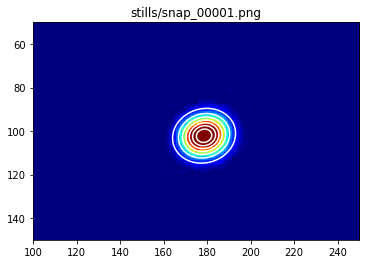

[319.07765444 178.12683616 101.64769089   7.28918048   6.21712397
   0.53578238   1.31396892]


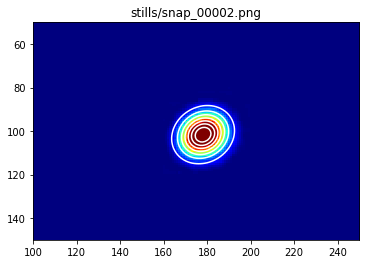

[318.80439024 177.73480431 101.68412207   7.50991778   6.078703
   0.60499688   1.31792861]


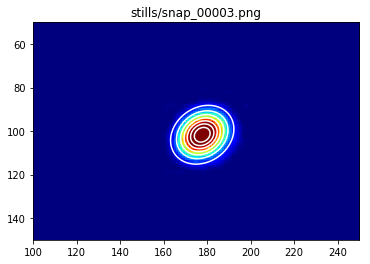

[318.48993627 177.70086975 101.66949128   6.07846468   7.52615174
   2.18609447   1.30398542]


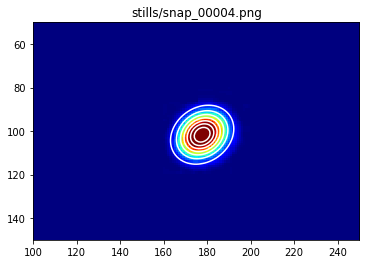

[318.28181174 177.69308142 101.67083664   7.53136277   6.08719058
   3.76406562   1.30535188]


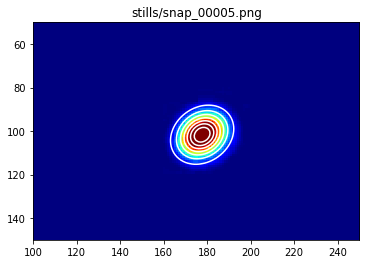

[318.11624789 177.68183258 101.67424299   7.54240068   6.08830612
   6.90321324   1.31840293]


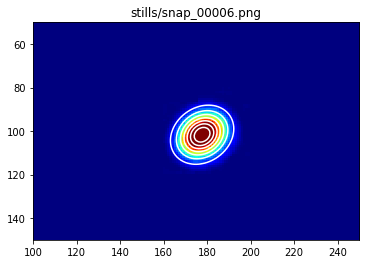

[317.97877439 177.68547501 101.67274734   7.55589309   6.08866815
   3.76564358   1.31461882]


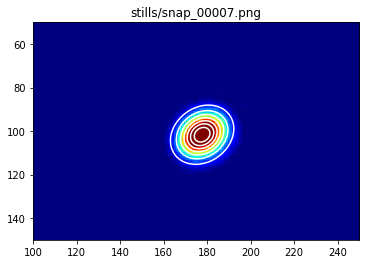

[315.75211042 177.45656853 101.6939969    7.36365403   6.30236736
   0.57773048   1.32141088]


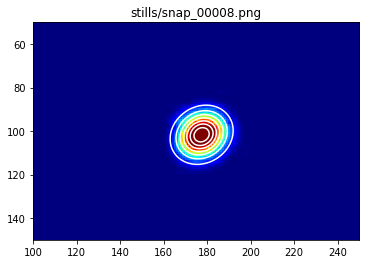

[303.60234235 176.59615913 101.69369133   6.92083885   6.74523244
   7.05031019   1.34816743]


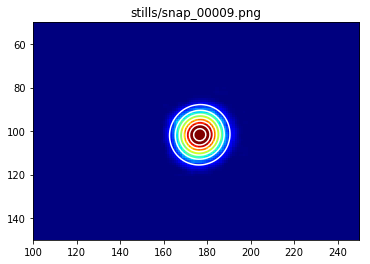

[303.27377214 176.59773746 101.70281907   6.75349556   6.92900761
 -10.14320395   1.34696651]


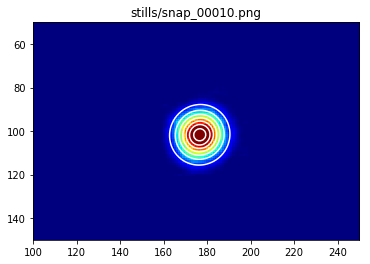

[302.94381987 176.58148232 101.71346882   6.76215111   6.94082311
   2.50777117   1.36003153]


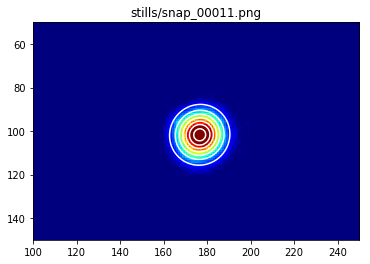

[302.94591563 176.58149124 101.71346601   6.76257103   6.94120092
   2.50802016   1.35015781]


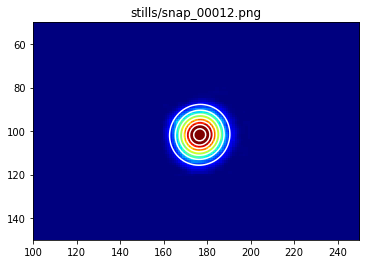

[302.50431415 176.57404152 101.7199239    6.76399271   6.9631975
   2.49631392   1.33746878]


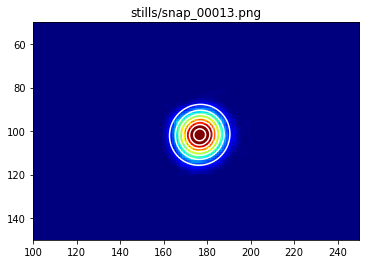

[302.39152535 176.57474305 101.72585986   6.96424701   6.76962175
   0.96553831   1.34168725]


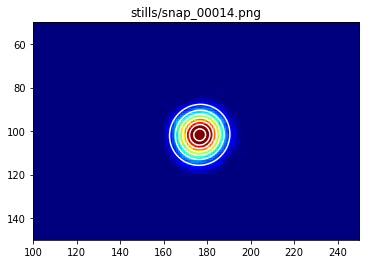

[284.80647459 177.40100827 103.65946854   6.96356351   6.37677709
 -21.76932476   1.32578073]


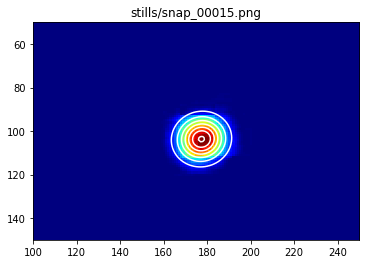

[278.80739462 177.96249565 106.65989569   6.6752293    7.78627239
  27.64467074   1.32934091]


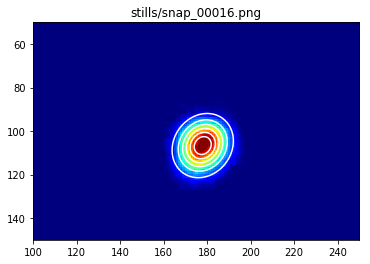

[278.54431655 177.97630109 106.66319712   6.66154576   7.81143729
   2.50710737   1.31384318]


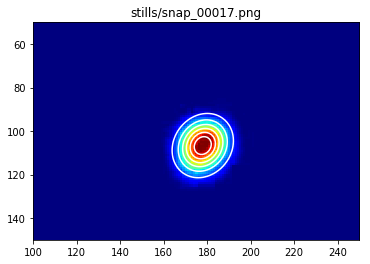

[278.25526948 177.97880718 106.67834401   6.68092696   7.81293778
   2.50560277   1.31875319]


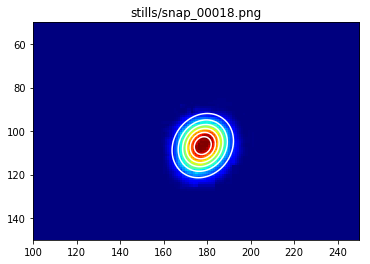

[278.17737642 177.97936864 106.68155517   6.68211553   7.81395679
   2.50518774   1.35350308]


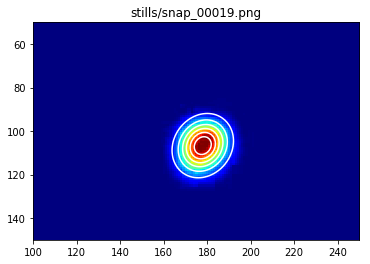

[278.0264296  177.97446177 106.68544124   6.67885456   7.82685853
   2.5059048    1.34960856]


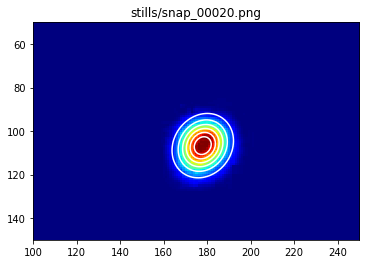

[278.03503926 177.97450902 106.6856798    6.67834412   7.8264806
   2.50567863   1.35320358]


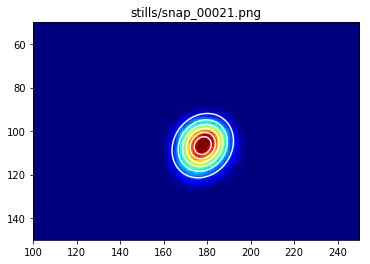

[ 2.80139657e+02  1.76710645e+02  1.06961673e+02  6.84062196e+00
  7.32378518e+00 -2.17180694e-01  1.36389902e+00]


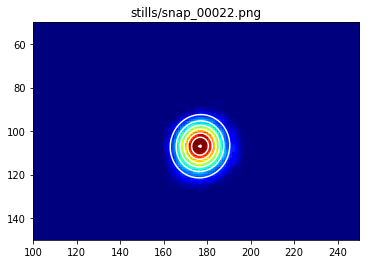

[282.26723988 176.55138768 106.93840886   6.87496205   7.25940562
  -0.29175826   1.37362335]


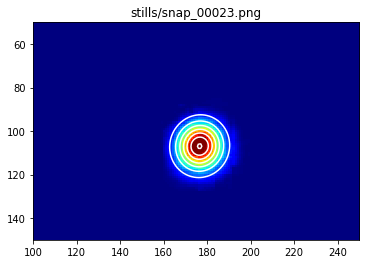

[ 2.82772551e+02  1.76539726e+02  1.06917247e+02  6.86564157e+00
  7.25139359e+00 -2.74140706e-01  1.32692701e+00]


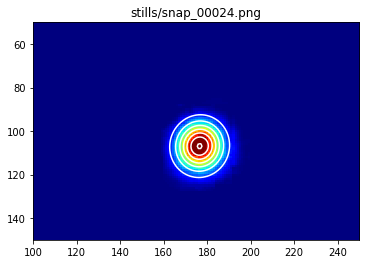

[282.94937312 176.54197506 106.91048469   7.24204349   6.87060906
  20.14725671   1.24743477]


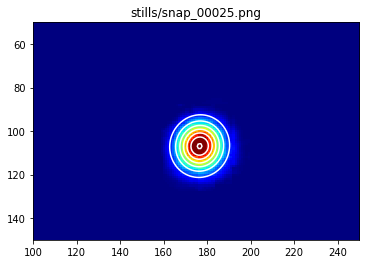

[282.94419891 176.54192166 106.91038317   6.86900416   7.24043605
  -3.41465918   1.28224949]


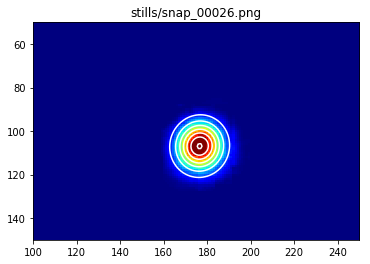

[283.63417435 176.5461558  106.91154501   7.21634551   6.87935817
   1.29499645   1.2770308 ]


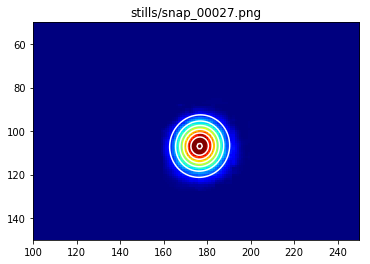

[2.86858326e+02 1.76329282e+02 1.06670121e+02 6.96613244e+00
 7.29121446e+00 7.04141512e-02 1.32877353e+00]


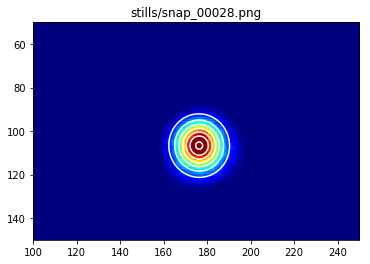

[285.24015416 175.3464013  106.01275945   6.82742574   7.43342674
  -0.69040972   1.34017283]


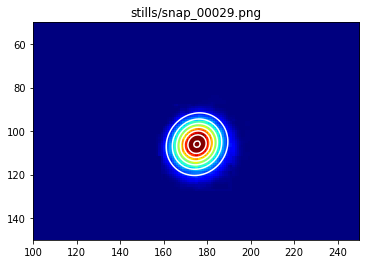

[285.32061931 175.34641289 106.00566832   6.82658524   7.42668111
  -0.70091358   1.33381905]


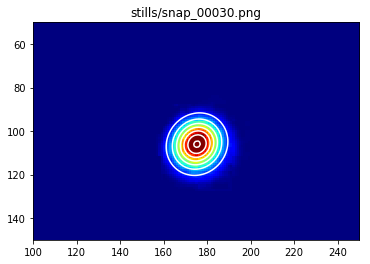

[285.32857375 175.33437445 106.01227208   6.81784691   7.44079957
  -0.70360154   1.36262998]


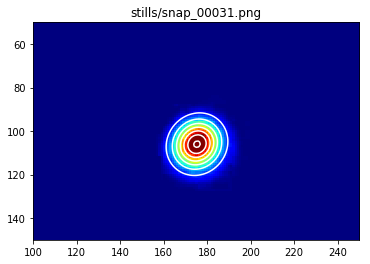

[285.08064495 175.32275886 106.00008985   6.8301784    7.44793576
  -0.71421688   1.35125673]


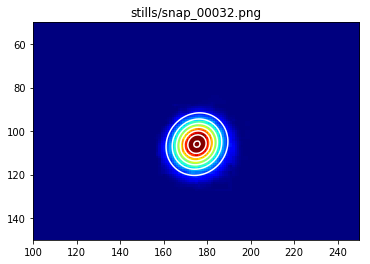

[285.1308654  175.32279403 105.99668738   6.82602234   7.45045786
  -0.71157499   1.35306969]


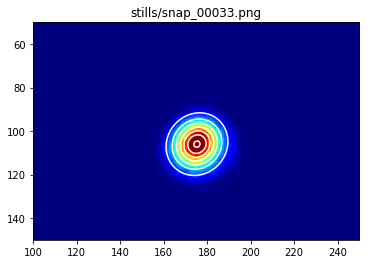

[285.13136088 175.32279622 105.99669753   6.82618324   7.45062579
  -0.71157922   1.34953507]


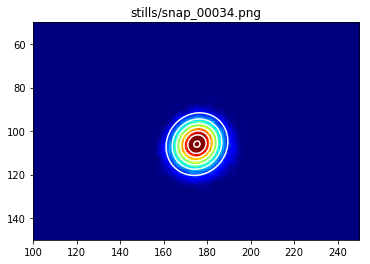

[296.99283407 175.89170343 104.7536786    6.67582432   7.46356215
  -0.78239147   1.34322562]


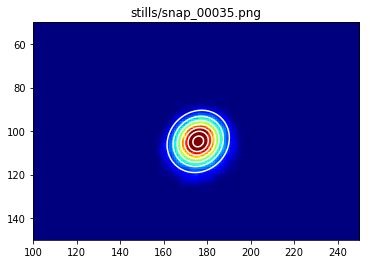

[302.04057214 176.20280022 104.26834135   7.11504881   6.52702506
 -18.41403168   1.3467018 ]


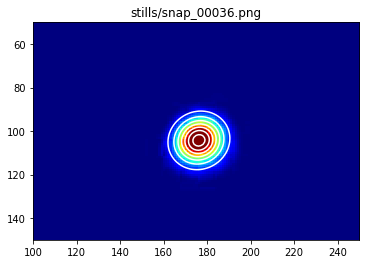

[302.07521117 176.20259473 104.2612998    7.11897398   6.53231188
  -5.84800913   1.31150327]


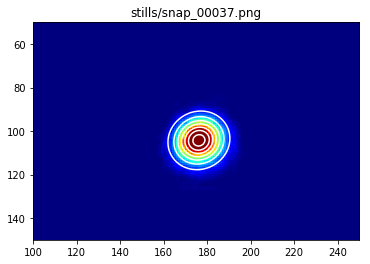

[302.07260143 176.20257089 104.26127514   7.1184157    6.53179506
  -5.84800396   1.32470566]


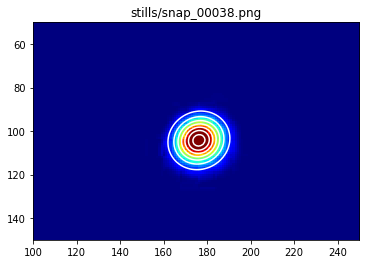

[ 302.00504516  176.23968839  104.2368409     6.53159196    7.14472559
 -239.90555936    1.32648121]


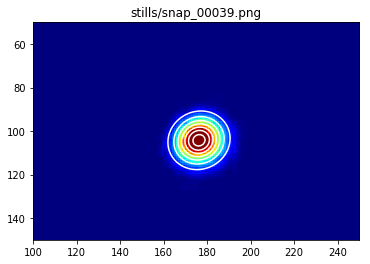

[ 302.00597069  176.239692    104.23684691    6.53172207    7.14490343
 -239.90557542    1.3226354 ]


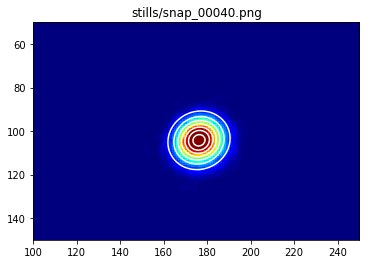

[303.16404221 176.20238737 103.75252087   7.17968282   6.84270388
   0.86283633   1.34112784]


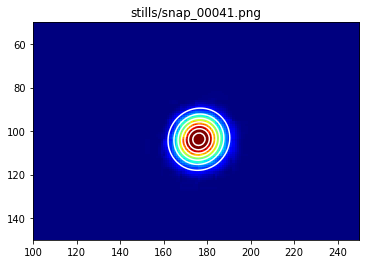

[313.49539103 176.37816502 102.41668075   6.94587278   6.74158875
  -7.22925647   1.32903987]


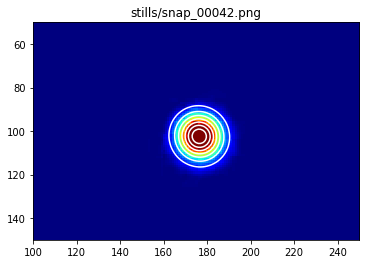

[313.93147097 176.38575229 102.38964858   6.73399478   6.9314084
  -2.45095895   1.31429326]


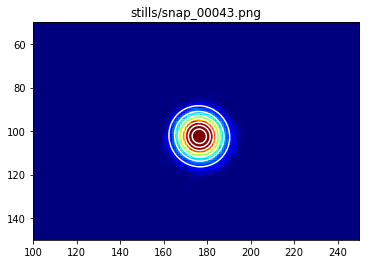

[314.25232571 176.37570575 102.37180508   6.9062271    6.73495977
   2.29206346   1.33237862]


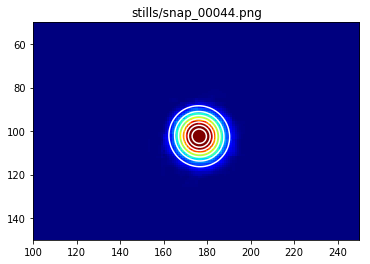

[314.42315184 176.37083823 102.37062069   6.73324169   6.89510938
   0.66436625   1.33108769]


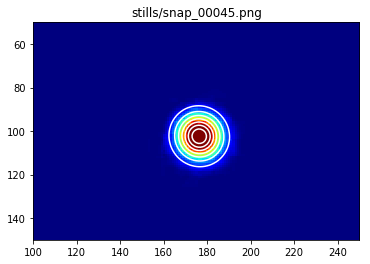

[314.43106889 176.37086232 102.37064391   6.7342545    6.89613308
   0.66445451   1.30363642]


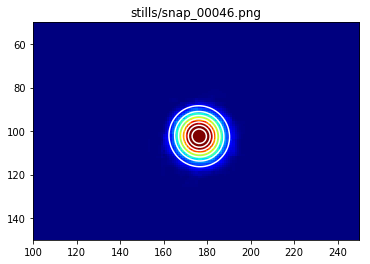

[314.65124415 176.38002263 102.36593865   6.71895226   6.89727895
   0.63676308   1.30841878]


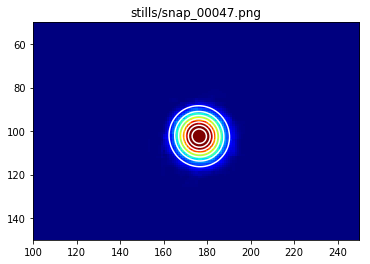

[3.12977132e+02 1.76445015e+02 1.01327580e+02 6.70662106e+00
 6.96558758e+00 1.69869571e-01 1.32320784e+00]


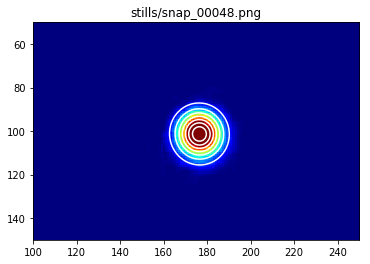

[314.9837329  176.52153087 100.57616003   6.67659185   6.56422795
  -0.34657665   1.33939375]


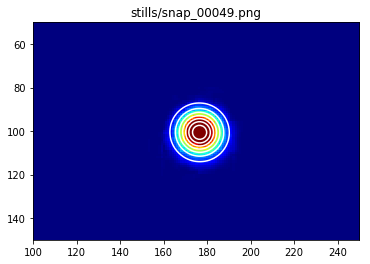

[315.27737289 176.53109908 100.57392533   6.6774812    6.56215475
  -0.32326911   1.34327079]


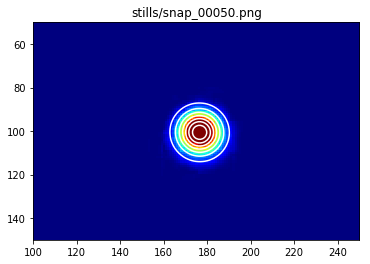

[ 3.15812923e+02  1.76543590e+02  1.00556786e+02  6.68595651e+00
  6.54478443e+00 -1.98009947e-01  1.31148483e+00]


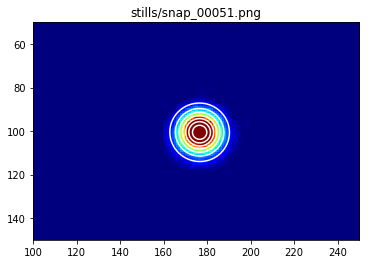

[ 3.15807652e+02  1.76543586e+02  1.00556758e+02  6.68532597e+00
  6.54417756e+00 -1.98079237e-01  1.32888783e+00]


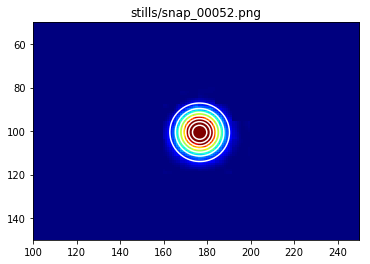

[ 3.15803258e+02  1.76543583e+02  1.00556736e+02  6.68480125e+00
  6.54367252e+00 -1.98139205e-01  1.34337516e+00]


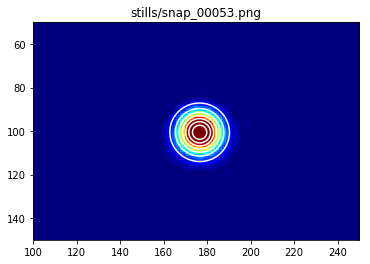

[315.89904534 176.54949061 100.53882454   6.56121434   6.68032378
   1.39672023   1.31205863]


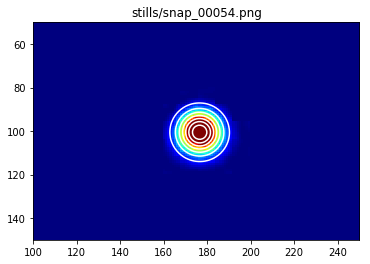

[312.81611975 177.7737711  101.30086603   6.78855759   6.89144333
  -1.44394408   1.22458263]


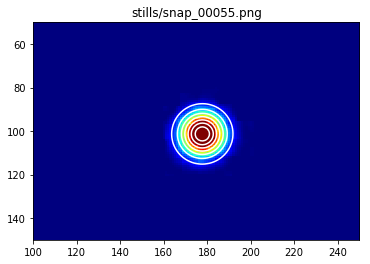

[311.32171008 177.80120828 101.37559659   6.89016136   6.90684449
  -1.18139923   1.26916629]


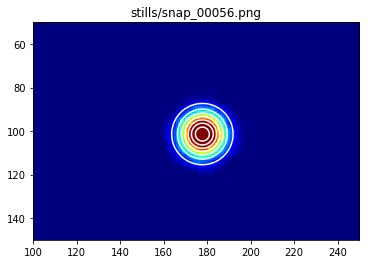

[311.19607813 177.80409214 101.37982161   6.89745632   6.90612406
  -1.42376081   1.28371312]


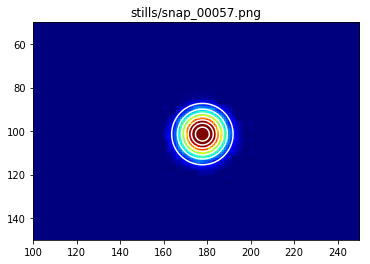

[310.88107008 177.81624892 101.3794195    6.89378429   6.92651159
  -1.50812157   1.31504686]


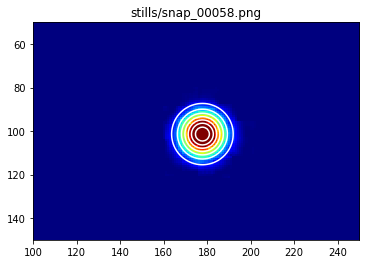

[310.87472599 177.81624009 101.37940152   6.89293991   6.92563222
  -1.50810739   1.33760665]


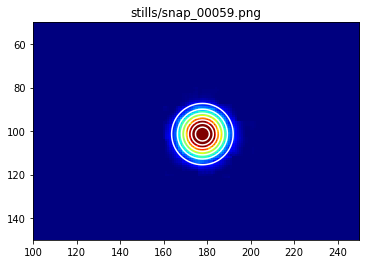

[310.75053163 177.83083203 101.36535912   6.90286666   6.92482165
  -1.22300323   1.33479407]


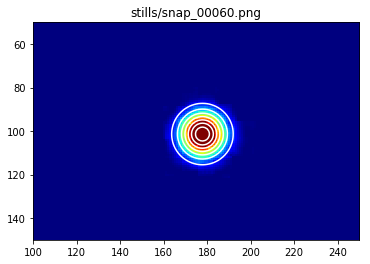

[310.515039   178.36796073 101.89774459   6.80727927   6.62341753
   0.57856075   1.32109119]


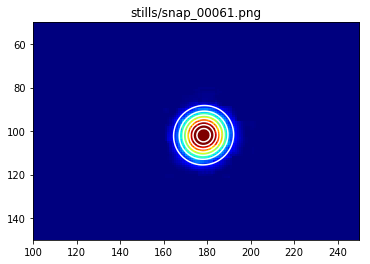

[320.06143258 179.04746908 102.98713796   6.89217582   6.51412891
  -7.54928035   1.3427649 ]


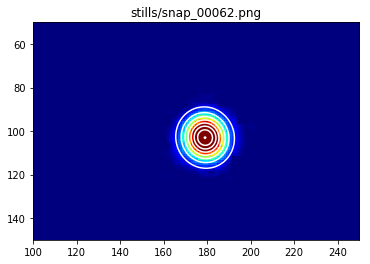

[320.087155   179.04910026 103.00609569   6.90942796   6.50058014
  89.85415302   1.34040401]


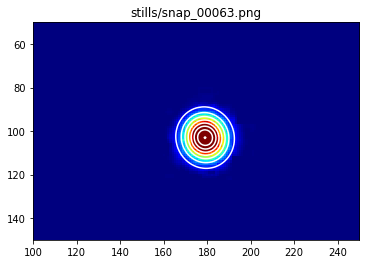

[320.0836624  179.04909986 103.00609135   6.90934178   6.50048676
  89.85414388   1.34429714]


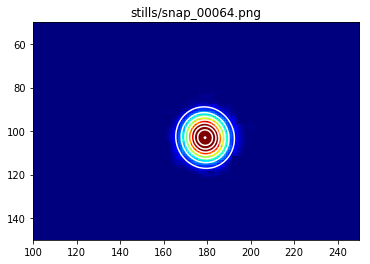

[320.03015478 179.0511122  103.0097349    6.91411356   6.49859354
  80.44328273   1.35043139]


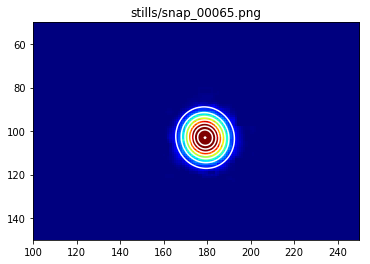

[320.17735641 179.05643393 103.02652302   6.48544354   6.9315064
   6.59648883   1.35646686]


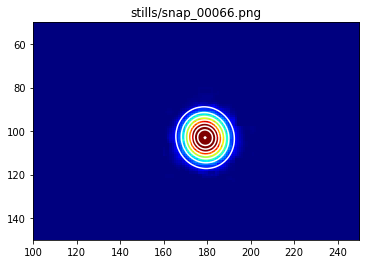

[320.21838405 179.05869205 103.02365286   6.93240388   6.48346986
   8.17273104   1.32393465]


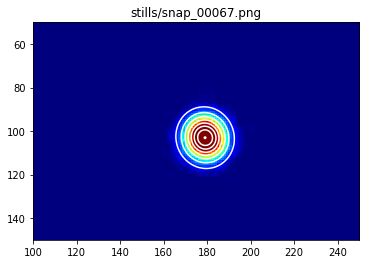

[317.84050579 179.19856901 103.77204196   6.47770402   6.77929242
 -18.97153229   1.34346081]


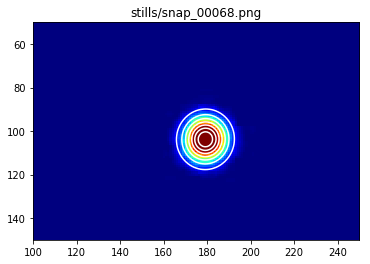

[319.02255006 179.08924399 104.00958106   6.95605902   6.45758072
  10.7041796    1.3514143 ]


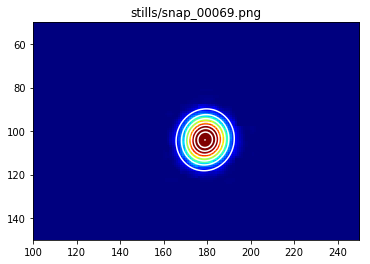

[319.01956367 179.08925971 104.00957778   6.95630933   6.4577244
  10.7041857    1.34826238]


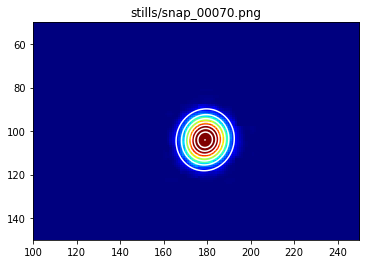

[319.43692602 179.07843657 104.02264854   6.45508301   6.93206127
   6.01543109   1.36842649]


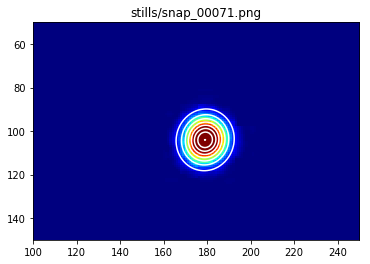

[319.33271452 179.08209743 104.03232903   6.45621434   6.92926639
   6.00648813   1.37088931]


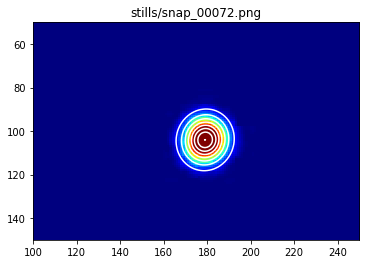

[319.43827395 179.08409226 104.02789576   6.92810208   6.45548191
   7.56527164   1.35623222]


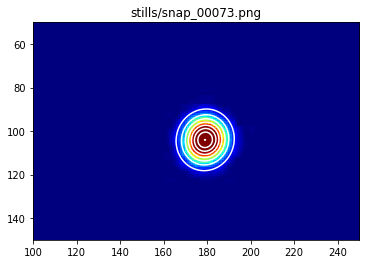

[320.52924706 179.02331736 103.82508859   6.51543768   7.01046516
   6.13662414   1.35990257]


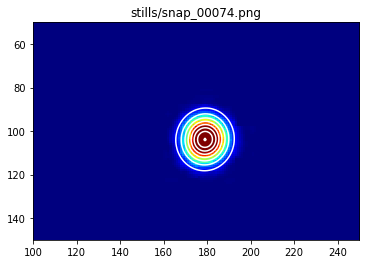

[320.39465209 178.60994463 102.93032938   6.6355219    6.74467972
  -2.07183715   1.35379425]


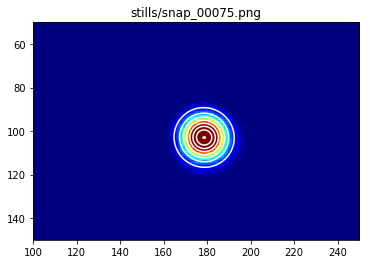

[320.20538408 178.62071773 102.91716347   6.73514768   6.66069956
  -3.53990265   1.33731685]


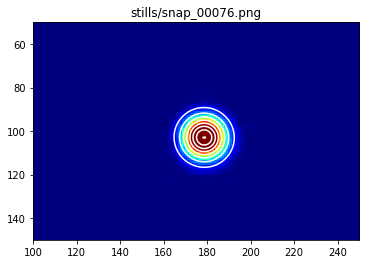

[320.03706454 178.61216822 102.91516247   6.74932914   6.65816822
  -3.5059638    1.33646904]


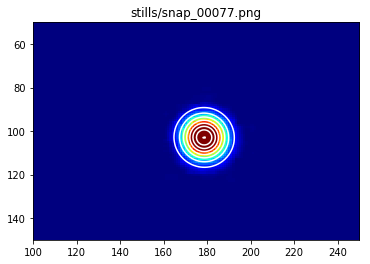

[320.06994014 178.59937216 102.89243234   6.75813656   6.64910681
  -3.49621155   1.34476734]


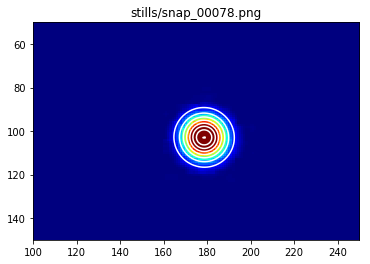

[319.99911841 178.60063423 102.87633722   6.75472514   6.66414285
  -3.55798172   1.36844116]


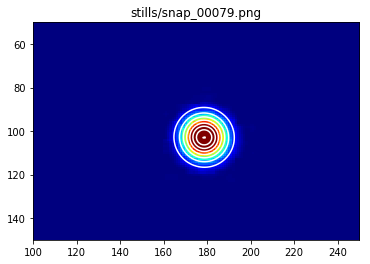

[320.05351949 178.59975179 102.87169831   6.7583994    6.65755446
  -3.55305014   1.37026875]


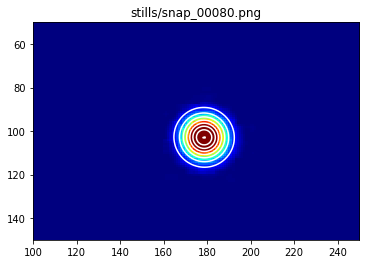

[319.83675923 178.51220409 103.95863006   6.42633352   6.67088742
 -17.11091085   1.37833358]


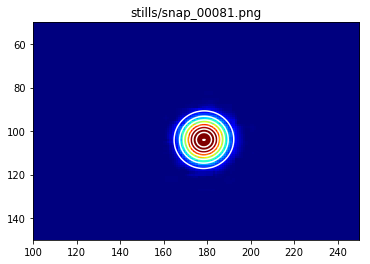

[321.44703032 178.41574437 104.47122472   6.633231     6.49078097
   7.19637791   1.34460252]


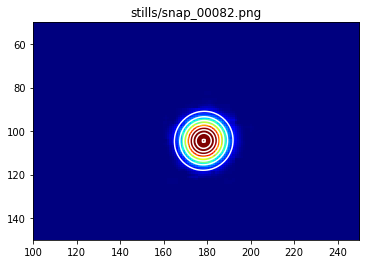

[321.53866984 178.42489444 104.47426367   6.63403955   6.48598607
  63.78324702   1.35582753]


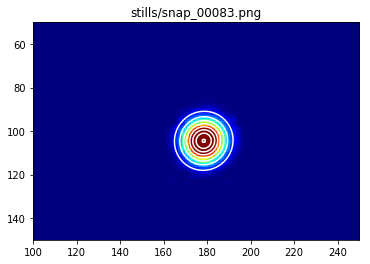

[321.55529104 178.42493254 104.47424725   6.63550324   6.48736831
  44.93342972   1.31265402]


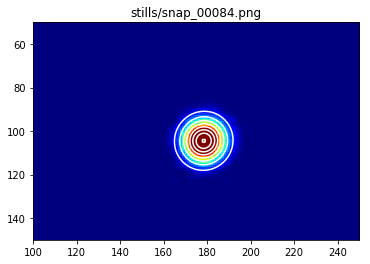

[321.58408855 178.42501739 104.47420793   6.49021455   6.63840636
  21.371273     1.22782712]


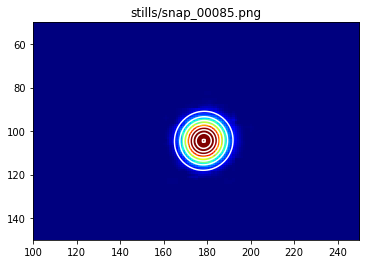

[321.17377787 178.40592843 104.52448708   6.50125818   6.65244179
   2.74408365   1.25656582]


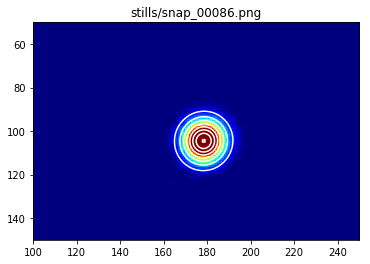

[320.5228535  178.41564153 104.49079371   6.49474879   6.70378394
   2.90111643   1.24977832]


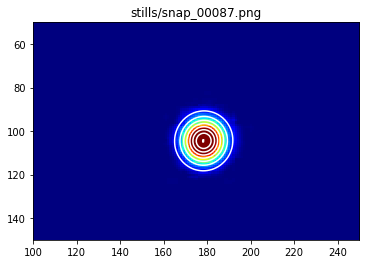

[ 3.22647526e+02  1.76682136e+02  1.02941490e+02  6.47080467e+00
  6.76396677e+00 -1.74451202e-01  1.28308406e+00]


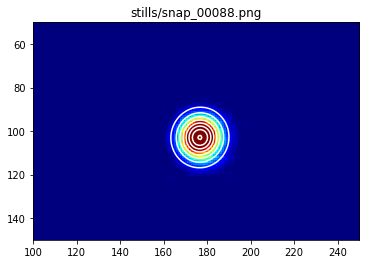

[324.72894145 176.64175899 102.77170621   6.40381115   6.64618933
  -0.64376086   1.29044637]


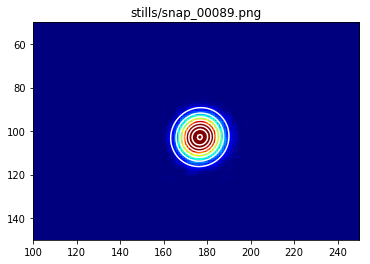

[324.74367925 176.64161921 102.77172323   6.40360717   6.64578817
  -0.64253248   1.29199774]


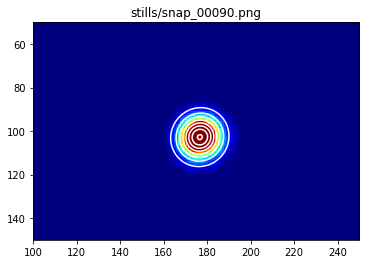

[324.73502464 176.64159826 102.77171138   6.40283847   6.64500464
  -0.64251928   1.31564338]


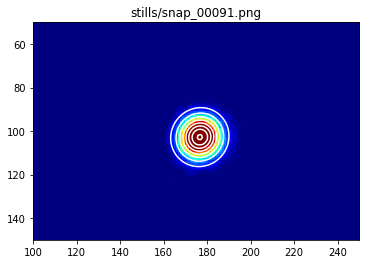

[324.73305352 176.64097817 102.76850439   6.40164033   6.64405497
  -0.65712633   1.32080748]


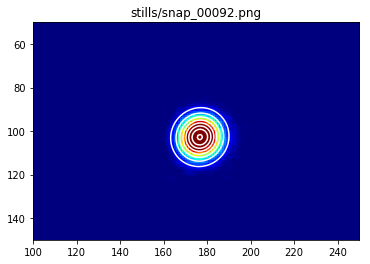

[324.8255718  176.60711334 102.78073544   6.40202438   6.63054852
  -0.62765391   1.3258826 ]


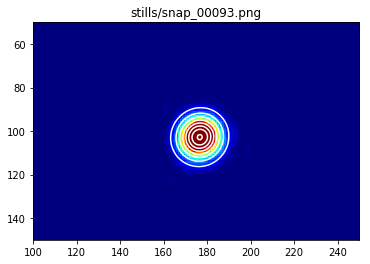

[322.72249742 176.50050482 102.02671047   6.89811109   6.65022425
 -11.50799667   1.32143648]


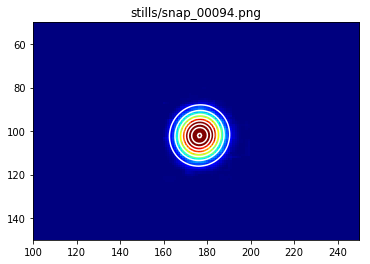

[3.25860154e+02 1.76287836e+02 1.00808622e+02 7.06185351e+00
 6.39437173e+00 2.30904098e-01 1.31656948e+00]


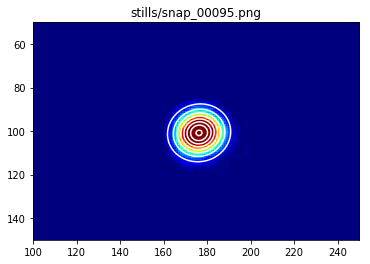

[325.72910448 176.29258508 100.80400916   7.07334839   6.39336097
  -2.8962067    1.33026508]


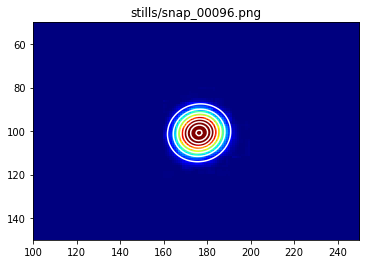

[325.72852784 176.2925883  100.80398023   7.07445471   6.39418877
  -2.89612006   1.30727553]


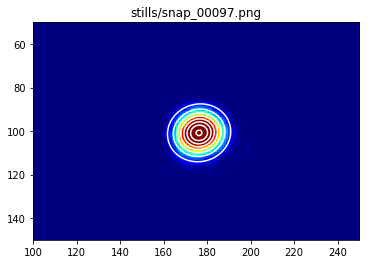

[325.72523198 176.29258393 100.80399074   7.07390231   6.39377132
  -2.89616608   1.32060015]


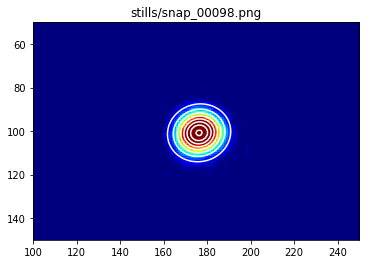

[3.25592564e+02 1.76307376e+02 1.00800918e+02 7.07399671e+00
 6.38619700e+00 2.41530772e-01 1.33227928e+00]


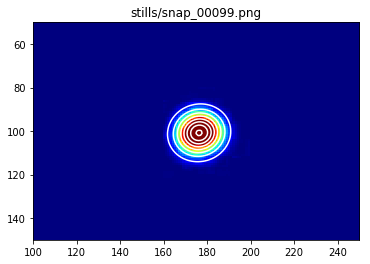

[3.25595898e+02 1.76307379e+02 1.00800922e+02 7.07429967e+00
 6.38647825e+00 2.41529532e-01 1.32354191e+00]


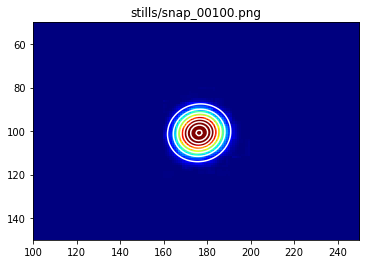

[3.24286808e+02 1.76474339e+02 1.01007295e+02 6.95476576e+00
 6.28033390e+00 1.34502712e-02 1.33246813e+00]


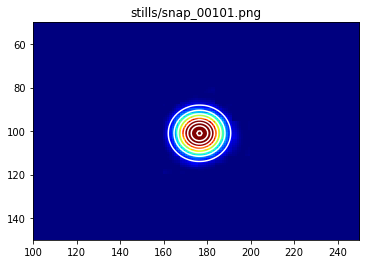

[325.04558596 176.57819436 101.08449754   6.30728742   6.93453196
   1.40374644   1.32863155]


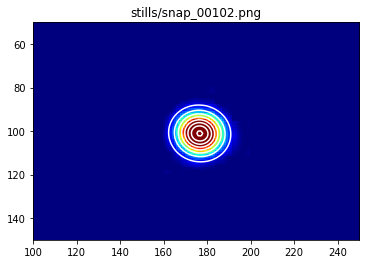

[325.00611911 176.58198064 101.0786096    6.307582     6.93352523
   1.405        1.31929802]


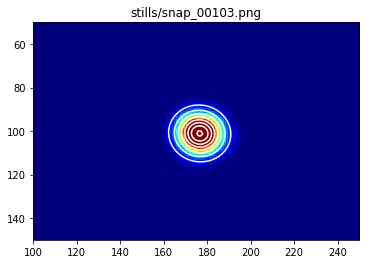

[324.90768575 176.58385916 101.08239561   6.31104263   6.93465788
   1.39927679   1.33646779]


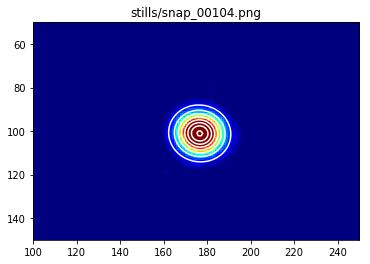

[ 3.24803393e+02  1.76605405e+02  1.01086694e+02  6.95880307e+00
  6.30163366e+00 -1.99018498e-01  1.31622855e+00]


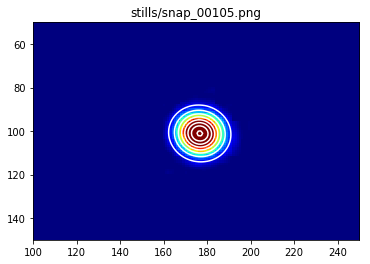

[ 3.24850360e+02  1.76616193e+02  1.01103179e+02  6.95188575e+00
  6.28695501e+00 -2.04196694e-01  1.30211185e+00]


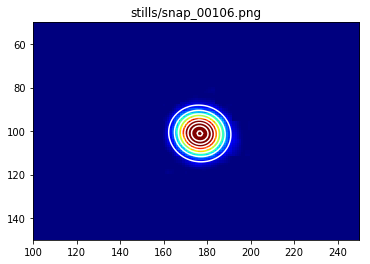

[324.36393789 177.21706704 101.02688287   6.37209666   6.9164702
  -1.37383554   1.31270527]


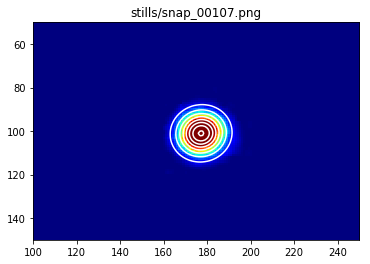

[323.25951403 178.67944399 100.59863561   6.87273579   6.21219518
  -0.41149038   1.31732311]


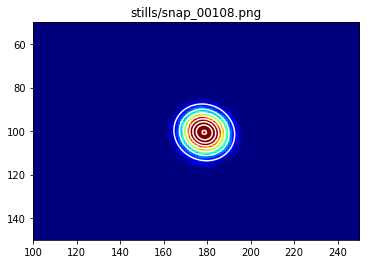

[323.24925789 178.67942834 100.59861579   6.87179371   6.2113328
  -0.41150032   1.34474916]


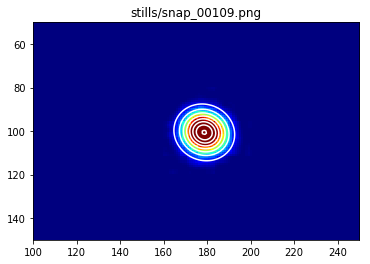

[323.11847033 178.6845077  100.6020202    6.88064419   6.21080245
  -0.41596427   1.34456264]


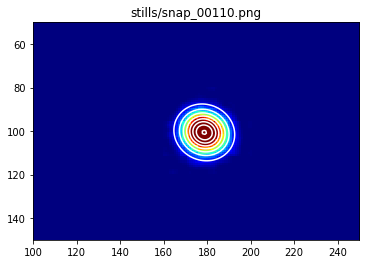

[323.25809868 178.6842585  100.59553649   6.87981132   6.20255988
  -0.4091859    1.35250506]


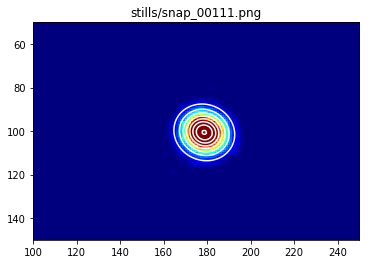

[323.56927972 178.68839294 100.59560484   6.87239563   6.20157029
  -0.41367023   1.32503882]


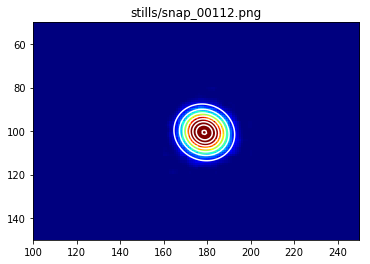

[323.56874594 178.68839183 100.59560384   6.87234709   6.201526
  -0.41367068   1.32645483]


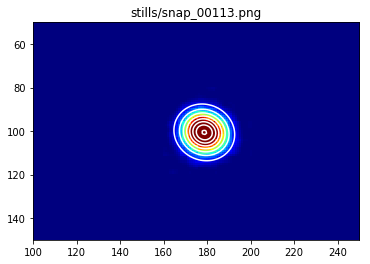

[ 3.26514850e+02  1.77976429e+02  9.96062473e+01  6.86984478e+00
  6.48125319e+00 -1.46230112e-01  1.28789516e+00]


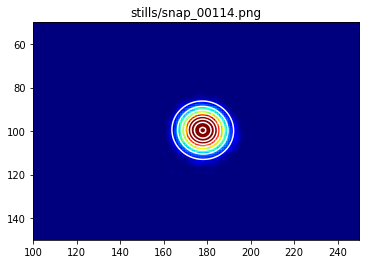

[326.88815325 177.45157823  99.39476211   6.92964159   6.25948773
   0.33066308   1.19927172]


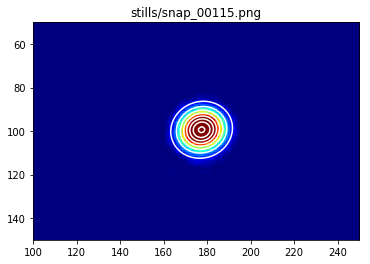

[326.68672888 177.44060783  99.39872698   6.93574064   6.25898602
   3.47692407   1.22793664]


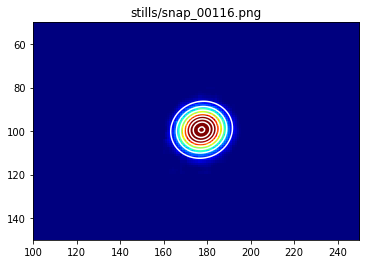

[326.60164989 177.42040879  99.39870834   6.9209418    6.26100444
   3.48858773   1.23602204]


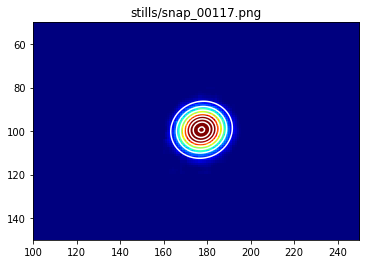

[326.54630282 177.40879966  99.39486762   6.93349514   6.25255434
   3.47794449   1.27585026]


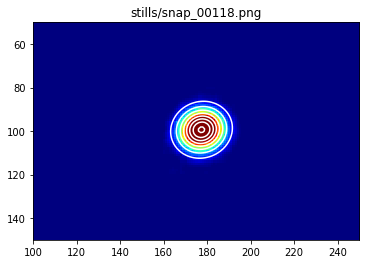

[326.54309408 177.40879657  99.39486247   6.93313842   6.2522546
   3.47792261   1.28556844]


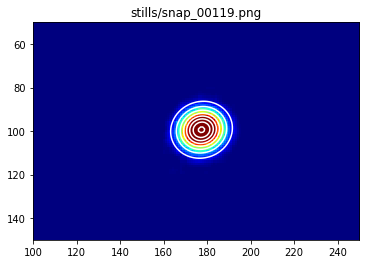

[3.22380884e+02 1.77306940e+02 9.98912539e+01 6.94217718e+00
 5.96835665e+00 1.43918387e-01 1.29579153e+00]


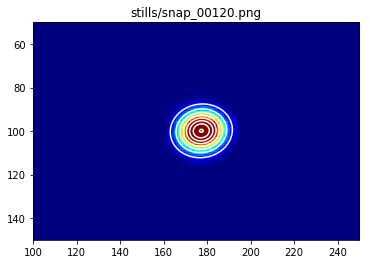

[323.09843997 176.30219561 102.00705519   7.10462577   6.45398706
   0.49543664   1.30472312]


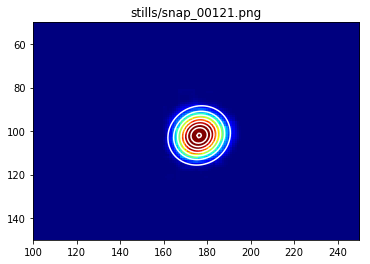

[322.31416034 176.30966996 102.06937816   7.11609988   6.51468829
   3.68229383   1.31149611]


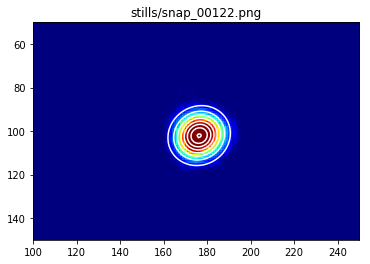

[321.90327385 176.29009647 102.0806806    6.52305953   7.13806399
   5.26107665   1.3177164 ]


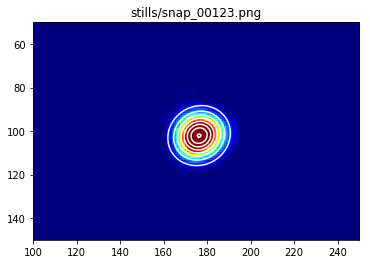

[321.90021637 176.29008857 102.08068245   6.52278584   7.13777159
   5.26109079   1.32591834]


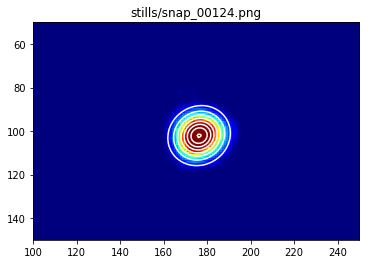

[321.90345761 176.29009694 102.08068048   6.52307597   7.13808156
   5.2610758    1.31722372]


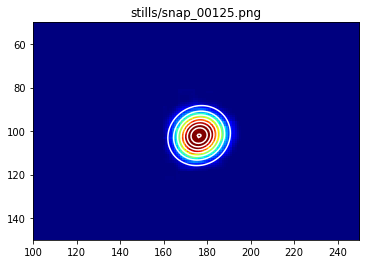

[321.89902317 176.29008549 102.08068318   6.52267908   7.13765753
   5.26109631   1.32911796]


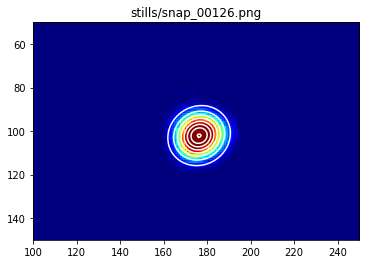

[320.73752577 176.53775731 102.06774446   6.54410403   6.87714769
  -4.2551187    1.32172444]


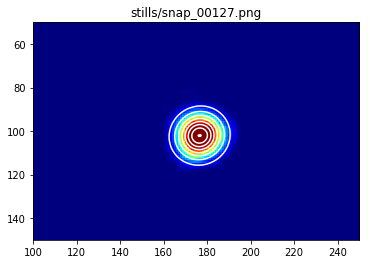

[322.55774984 176.87298206 101.92157839   6.29703148   6.66759436
  -8.10333791   1.32890384]


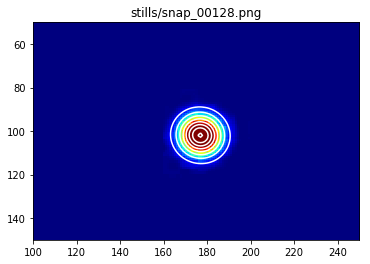

[322.55223153 176.87298681 101.92158159   6.29654826   6.66709163
  -8.10336956   1.3439316 ]


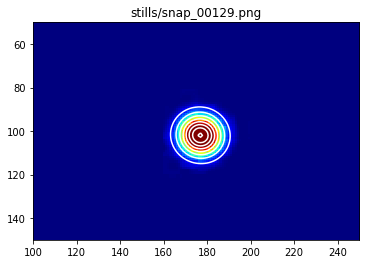

[322.94701289 176.83958287 101.9474076    6.65438288   6.25959436
  -3.41740234   1.34160757]


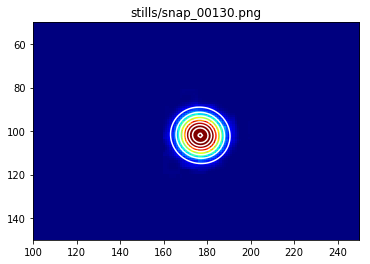

[323.12170679 176.85179124 101.94985127   6.26162826   6.63697355
  -4.9934574    1.35600669]


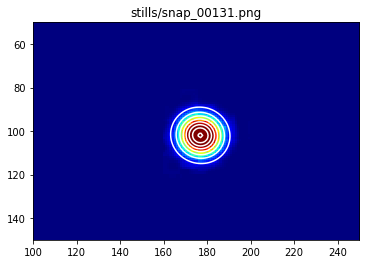

[323.11475581 176.85179696 101.94987462   6.26133915   6.63683675
  -4.9935658    1.36487867]


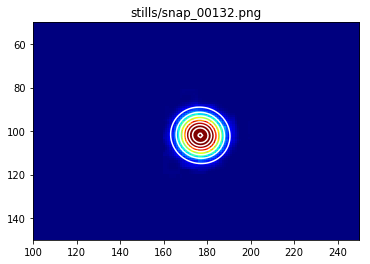

[323.05757756 176.85339645 101.95122817   6.26222971   6.63823944
  -4.9889904    1.34820091]


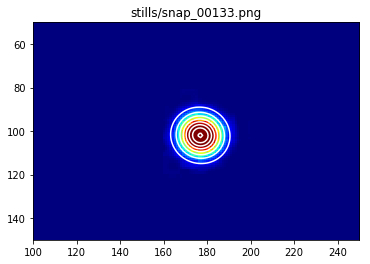

[325.1852987  177.54383447 100.985888     6.51080699   6.42674844
  -1.33507035   1.34225357]


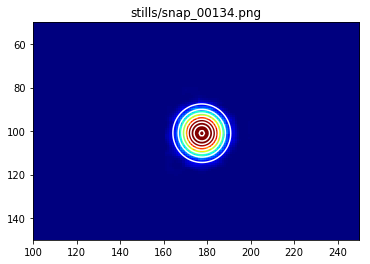

[325.29837153 177.59483294 100.80226532   6.49099521   6.32935226
   5.78467873   1.3268916 ]


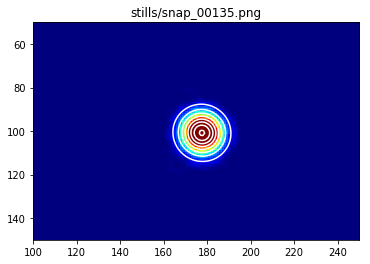

[325.29831065 177.59483295 100.80226528   6.49099001   6.32934698
   5.78467842   1.327055  ]


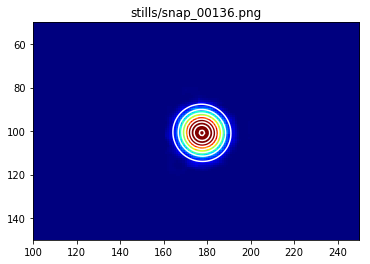

[325.20537287 177.59917394 100.79718763   6.49037245   6.3431563
  -3.59845314   1.29418246]


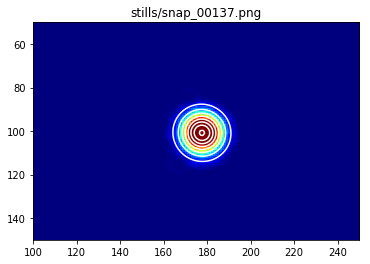

[325.167046   177.60438218 100.76096132   6.50330277   6.33345747
  -3.74219016   1.30048117]


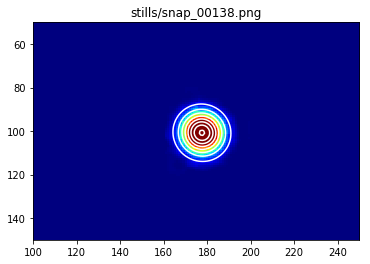

[325.28650197 177.61219784 100.7765001    6.48562244   6.33423746
  -0.53572189   1.33752591]


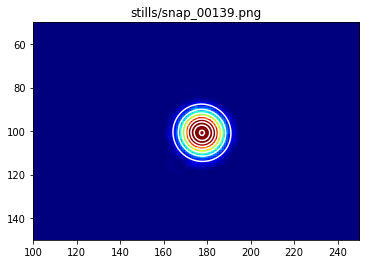

[319.47613704 178.14330623 101.32288977   6.55778768   6.03082602
  12.63420207   1.30701985]


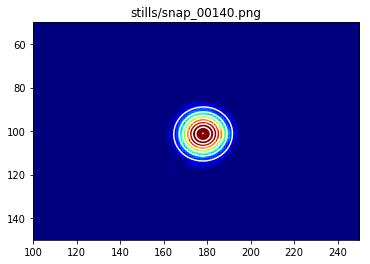

[ 3.22817204e+02  1.79181266e+02  1.02891635e+02  6.98143996e+00
  6.34341858e+00 -1.70128883e-01  1.32653288e+00]


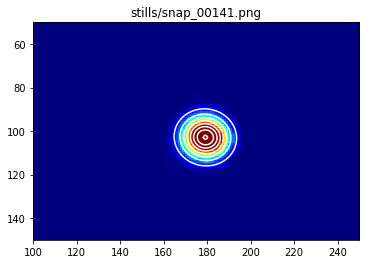

[ 3.22818451e+02  1.79181262e+02  1.02891636e+02  6.98155709e+00
  6.34352732e+00 -1.70126954e-01  1.32317181e+00]


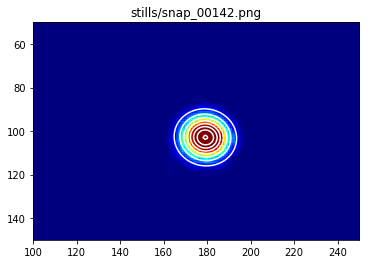

[ 3.22794237e+02  1.79180785e+02  1.02891078e+02  6.97992985e+00
  6.34375094e+00 -1.68904165e-01  1.34784164e+00]


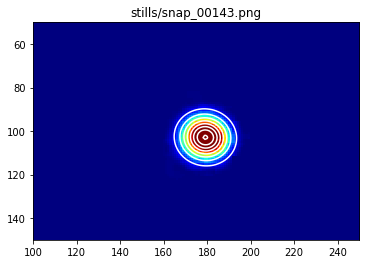

[ 3.22644332e+02  1.79173802e+02  1.02893238e+02  6.99106742e+00
  6.34711489e+00 -1.60333406e-01  1.28919448e+00]


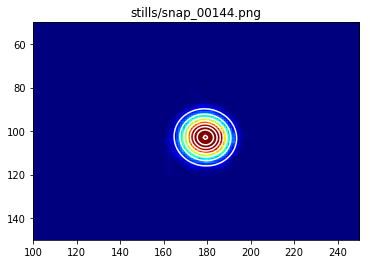

[ 3.22626913e+02  1.79169753e+02  1.02894645e+02  6.99787419e+00
  6.35068803e+00 -1.55904844e-01  1.19947742e+00]


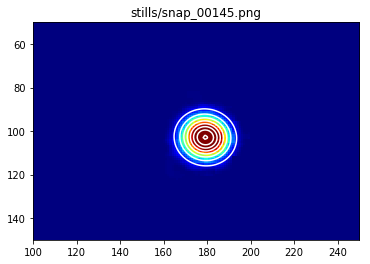

[ 3.22613218e+02  1.79169806e+02  1.02894637e+02  6.99659052e+00
  6.34950147e+00 -1.55930400e-01  1.23619326e+00]


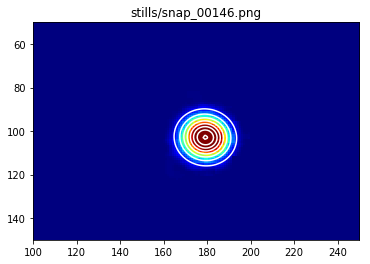

[321.70489239 177.90940824 101.66594436   6.61454537   6.7612531
   1.47747203   1.23218474]


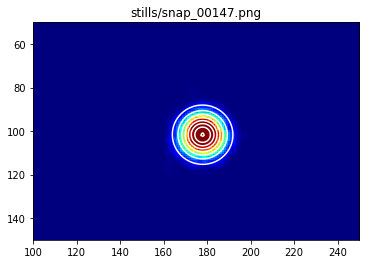

[323.05782007 177.1785638  101.23555763   6.82955983   6.10187132
  -2.48563253   1.28830528]


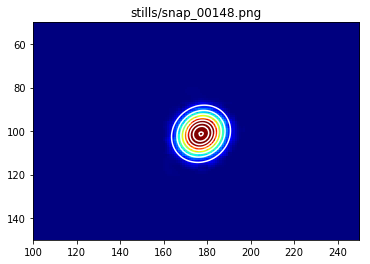

[322.87121115 177.16734472 101.20900905   6.85154633   6.11615991
   3.8235103    1.274928  ]


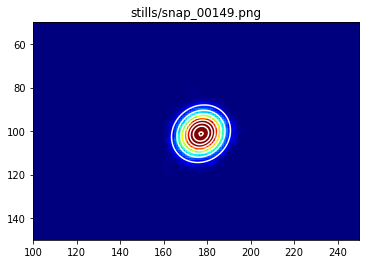

[322.95039223 177.16754355 101.21026692   6.84984643   6.11445418
   3.82142332   1.28394348]


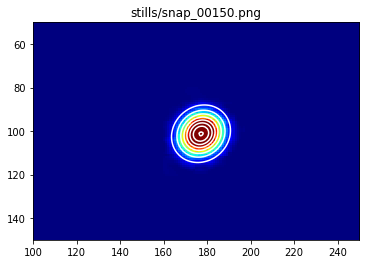

[324.04891881 177.13975503 101.22498378   6.85881083   6.08683157
   3.79984541   1.31727729]


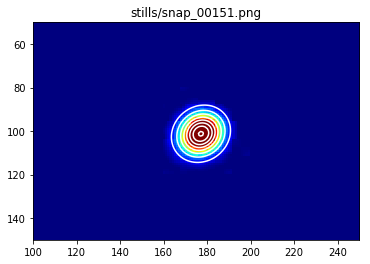

[324.04866368 177.13975563 101.22498336   6.8587862    6.08680941
   3.79984584   1.31799063]


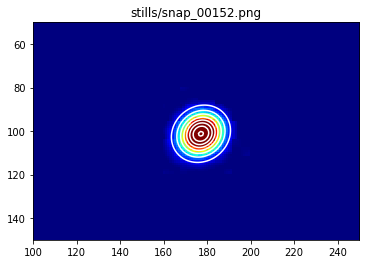

[322.55911912 177.11784383 101.37131474   6.84025104   6.04075894
   0.56062495   1.31162234]


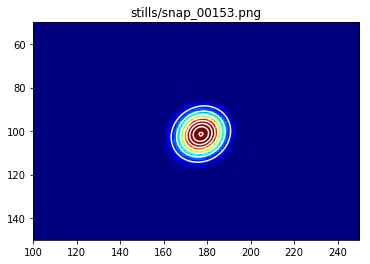

[321.33714533 176.95289923 102.30819591   6.44361238   7.26774442
  -1.17444863   1.31720128]


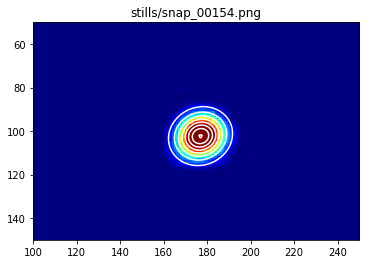

[320.9357388  176.94652913 102.31564001   7.272918     6.46291803
   0.39106944   1.31436296]


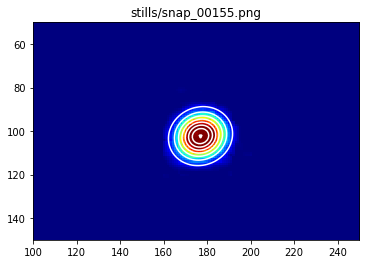

[321.00396869 176.92385885 102.2804152    7.28051818   6.50209549
   0.36262199   1.31302534]


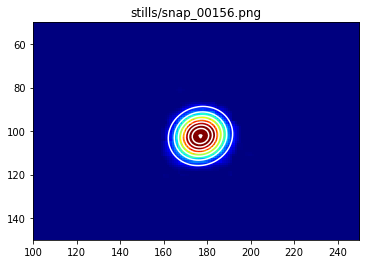

[320.85636146 176.91185282 102.27809321   6.50478709   7.29060194
  -1.21948351   1.32507634]


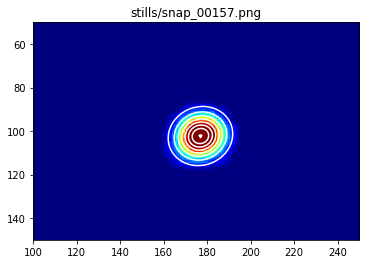

[320.8555865  176.91185253 102.27809141   6.50471556   7.29052135
  -1.21948257   1.32723265]


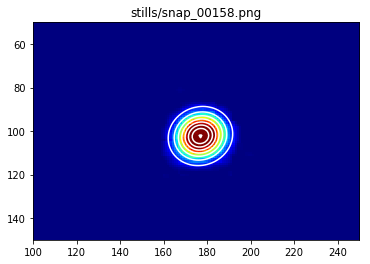

[320.85609158 176.91325685 102.26765728   7.2898525    6.49802673
   0.34622839   1.32789139]


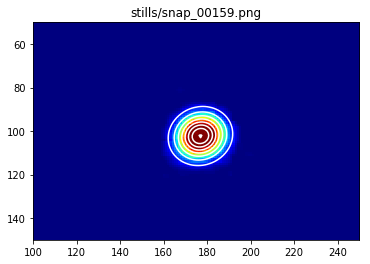

[320.1418482  176.68768448 101.96006187   7.47011757   6.33562401
  -2.90560153   1.33916123]


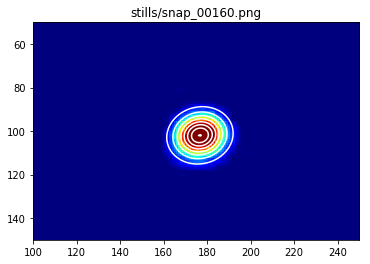

[3.22131313e+02 1.76494405e+02 1.01609438e+02 7.68526984e+00
 6.06080498e+00 1.36381621e-01 1.35512449e+00]


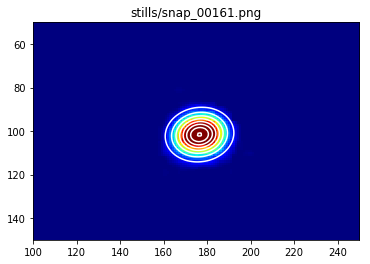

[3.22222473e+02 1.76481494e+02 1.01609857e+02 7.69607958e+00
 6.06004773e+00 1.34176263e-01 1.29888049e+00]


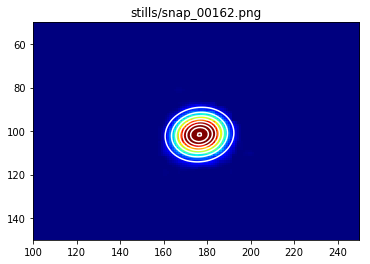

[3.22357970e+02 1.76483916e+02 1.01603868e+02 7.69449011e+00
 6.05120553e+00 1.31418055e-01 1.32627060e+00]


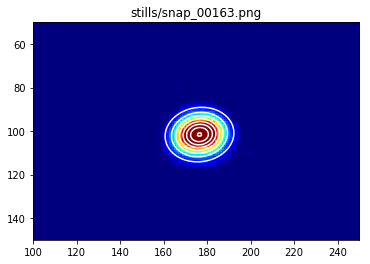

[3.22516340e+02 1.76491998e+02 1.01575726e+02 7.69732609e+00
 6.05128678e+00 1.51976437e-01 1.33554903e+00]


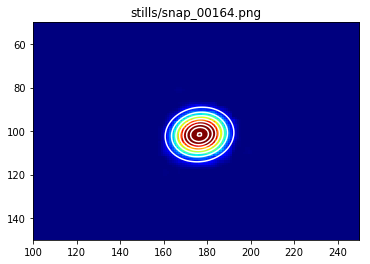

[3.22523288e+02 1.76491999e+02 1.01575741e+02 7.69804350e+00
 6.05188417e+00 1.51977961e-01 1.31660136e+00]


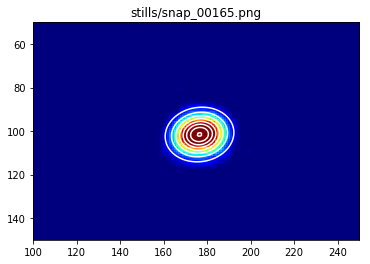

[3.22107435e+02 1.76516253e+02 1.01554260e+02 7.71780220e+00
 6.03776035e+00 1.52391593e-01 1.30890814e+00]


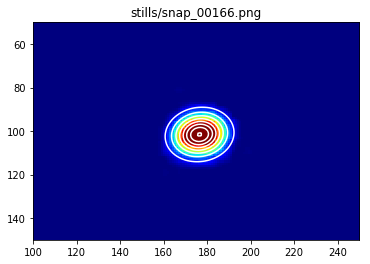

[ 3.17620857e+02  1.77207898e+02  1.01526053e+02  7.07956811e+00
  6.61462552e+00 -9.41702172e-04  1.30309431e+00]


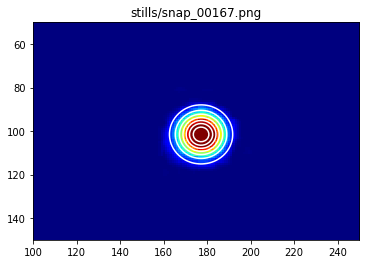

[317.68346338 177.21948178 101.74795133   6.79150628   7.04883342
   1.44022845   1.30501242]


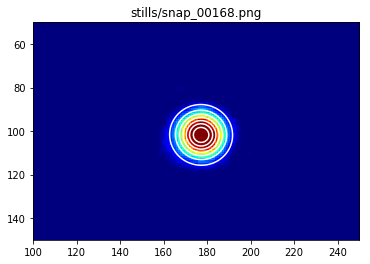

[ 3.17766150e+02  1.77222091e+02  1.01732462e+02  7.04199168e+00
  6.79871647e+00 -2.13402580e-01  1.33391855e+00]


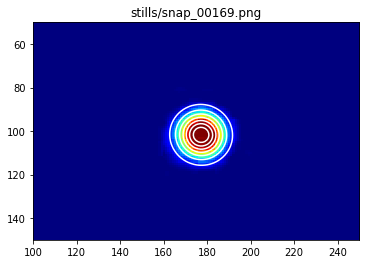

[ 3.17652725e+02  1.77227703e+02  1.01737842e+02  7.04968929e+00
  6.80180089e+00 -2.45687186e-01  1.30643335e+00]


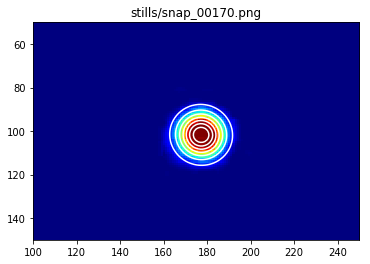

[ 3.17647536e+02  1.77227726e+02  1.01737837e+02  7.04872672e+00
  6.80076881e+00 -2.45871906e-01  1.33192114e+00]


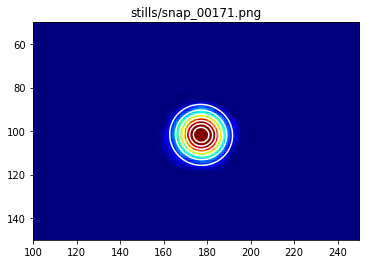

[ 3.17645389e+02  1.77227734e+02  1.01737832e+02  7.04848266e+00
  6.80056209e+00 -2.45861630e-01  1.33815819e+00]


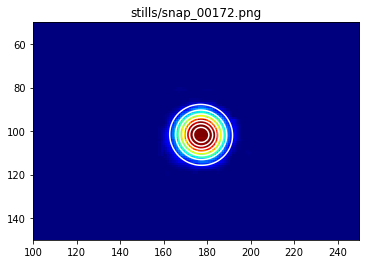

[ 3.15977967e+02  1.76663729e+02  1.02132327e+02  7.21992743e+00
  6.48699631e+00 -2.27724036e-01  1.34856431e+00]


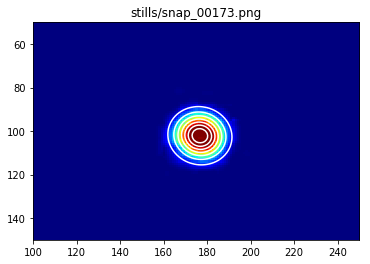

[3.17605396e+02 1.75623169e+02 1.02470643e+02 7.53492924e+00
 6.12420320e+00 6.63149979e-02 1.30891683e+00]


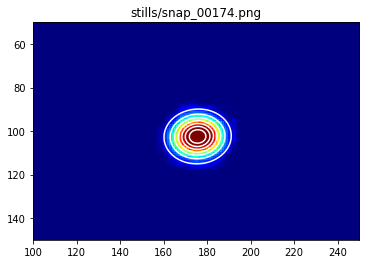

[3.17596481e+02 1.75609574e+02 1.02464223e+02 7.53893318e+00
 6.13327506e+00 7.09334003e-02 1.23684683e+00]


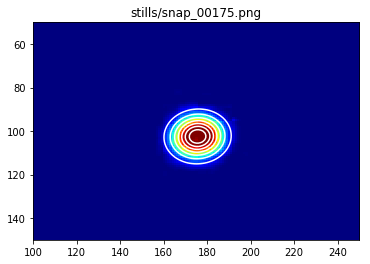

[3.17525789e+02 1.75606219e+02 1.02461723e+02 7.54001004e+00
 6.13378635e+00 6.87455567e-02 1.27585901e+00]


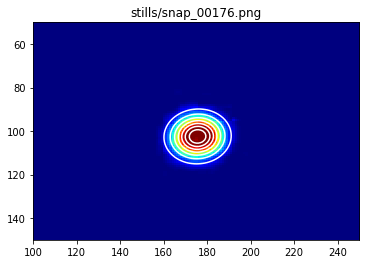

[3.17526742e+02 1.75606217e+02 1.02461723e+02 7.54011392e+00
 6.13387423e+00 6.87455154e-02 1.27315151e+00]


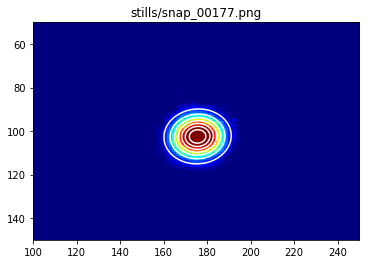

[3.17518841e+02 1.75606232e+02 1.02461724e+02 7.53813936e+00
 6.13228017e+00 6.87414213e-02 1.31852730e+00]


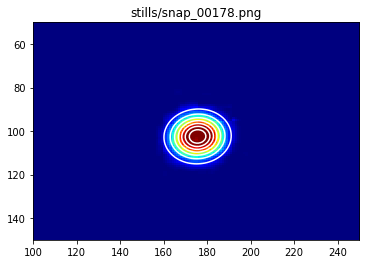

[3.17522747e+02 1.75606224e+02 1.02461726e+02 7.53857635e+00
 6.13264914e+00 6.87414649e-02 1.30719675e+00]


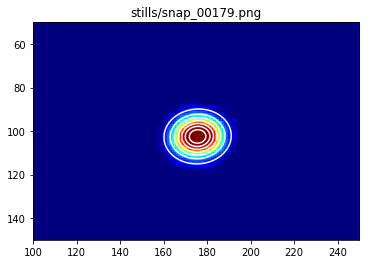

[3.12764155e+02 1.77020686e+02 1.03521258e+02 7.26927420e+00
 5.81984013e+00 1.82043456e-01 1.33498965e+00]


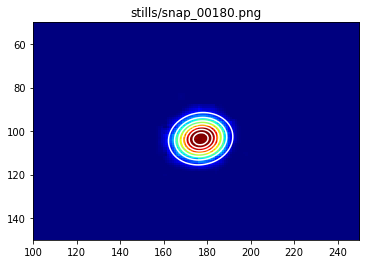

[317.60360458 177.63612977 103.80830511   7.04655506   6.03424543
  -3.07315226   1.36448385]


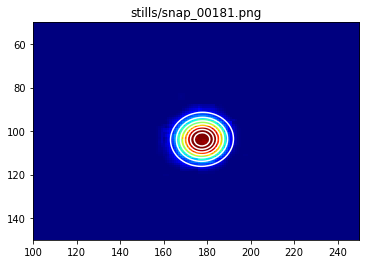

[317.81785343 177.64385871 103.80570992   7.03297445   6.03503075
  -6.21787441   1.35218475]


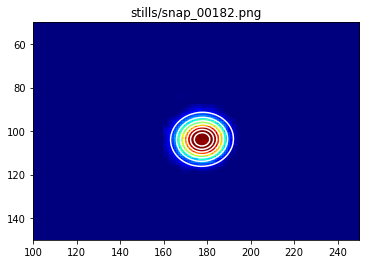

[317.81608736 177.64387215 103.80571421   7.0328157    6.03488556
  -6.21787419   1.35677278]


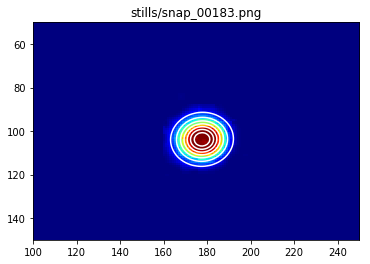

[317.80877587 177.64449441 103.80750874   7.03000418   6.03948929
  -6.22016048   1.35509708]


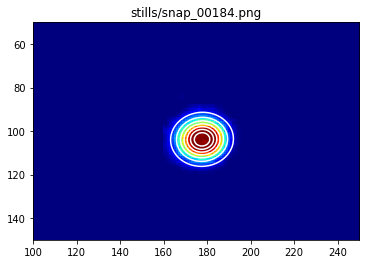

[317.65632305 177.66990622 103.79247754   7.01340697   6.04167223
  -6.22993006   1.35274987]


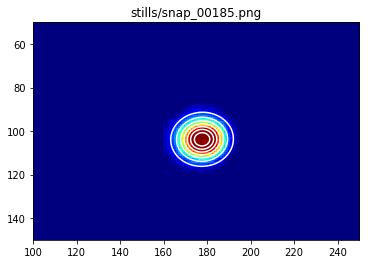

[318.15623688 177.63050564 103.47873063   6.98056509   6.2886944
  -6.27602492   1.34700298]


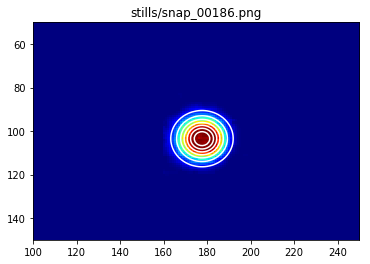

[3.20764126e+02 1.76975150e+02 1.02652201e+02 6.97635417e+00
 6.23911082e+00 9.57673047e-03 1.33410077e+00]


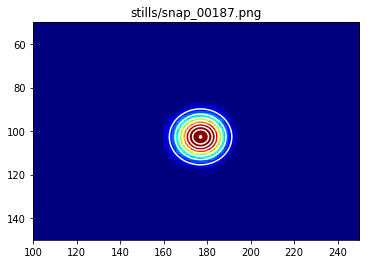

[3.20825344e+02 1.76971884e+02 1.02655054e+02 6.97702321e+00
 6.23953845e+00 1.02085763e-02 1.34009428e+00]


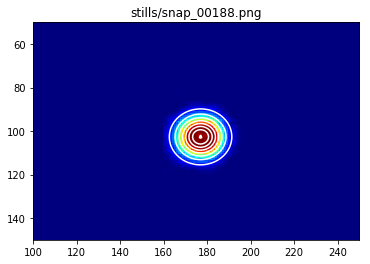

[3.20741983e+02 1.76960181e+02 1.02638489e+02 6.97057962e+00
 6.25603537e+00 7.91976415e-04 1.34124114e+00]


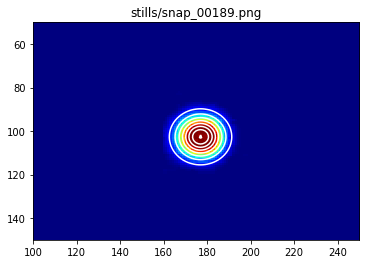

[3.20741548e+02 1.76960183e+02 1.02638489e+02 6.97053533e+00
 6.25599527e+00 8.01059330e-04 1.34248215e+00]


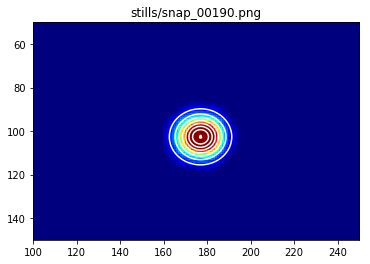

[320.73095057 176.94296558 102.64375116   6.25771524   6.95425079
   1.56168164   1.36168415]


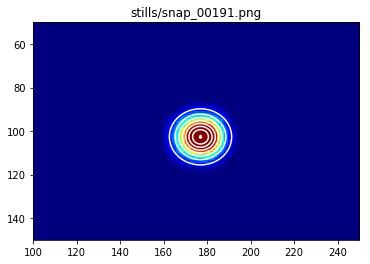

[320.73452426 176.94300427 102.64373458   6.25787766   6.95476418
   1.56171021   1.35189611]


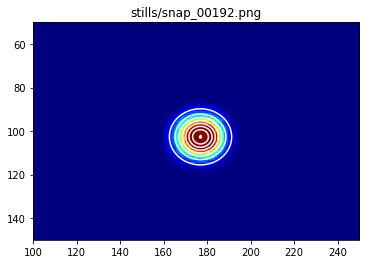

[319.61787811 175.86143116 102.9987311    6.18291165   6.77695294
   4.66528336   1.34900492]


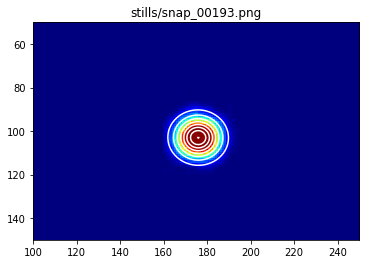

[324.16125641 175.05563414 103.35016109   6.56625486   6.25519969
  -6.32527791   1.35926392]


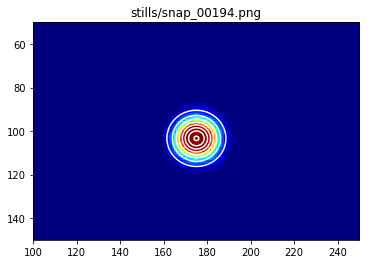

[3.24259331e+02 1.75024739e+02 1.03325585e+02 6.55428213e+00
 6.24486200e+00 2.80190039e-02 1.33166431e+00]


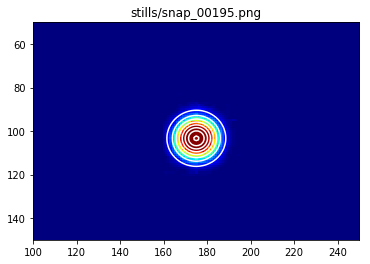

[324.02615934 175.01941896 103.32793678   6.25000914   6.55901574
  -1.51877299   1.32609746]


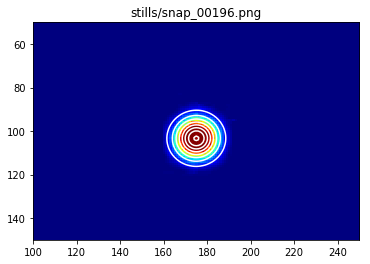

[324.18462537 175.00766419 103.33126459   6.25177613   6.54395461
   7.89068573   1.32477067]


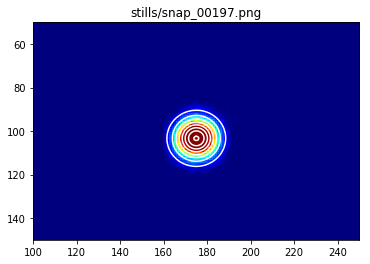

[3.23841912e+02 1.75007999e+02 1.03344435e+02 6.54194152e+00
 6.26803195e+00 2.57884632e-02 1.32567661e+00]


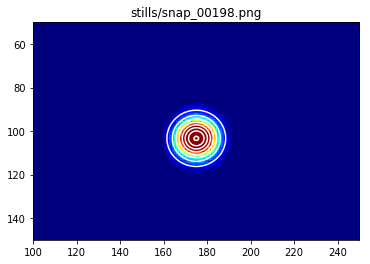

[323.59820057 175.01173644 103.3332301    6.54060332   6.28178793
   3.19290048   1.36246945]


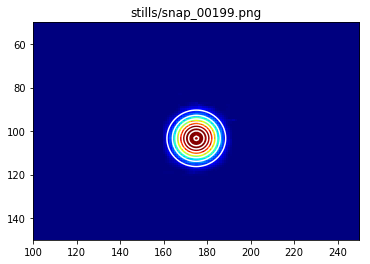

[319.18451855 175.28277694 103.49909117   6.2721707    6.58609865
  -3.26449418   1.36591069]


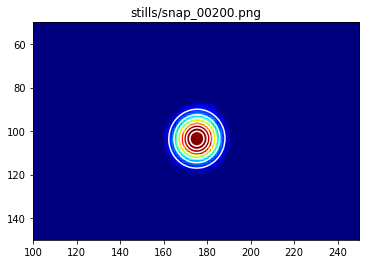

[3.19362854e+02 1.75317737e+02 1.03566188e+02 6.23122239e+00
 6.70206217e+00 1.10097837e-02 1.35720660e+00]


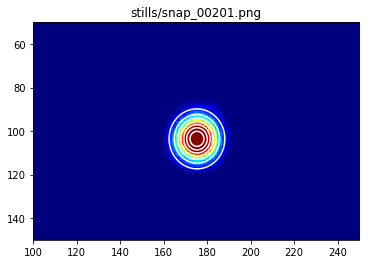

[3.19364961e+02 1.75317736e+02 1.03566182e+02 6.23141270e+00
 6.70226232e+00 1.10047077e-02 1.35133051e+00]


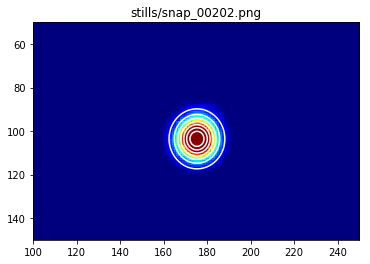

In [8]:
for i in range(1,203):
    if i<10:
        file = 'stills/snap_0000{}.png'.format(i)
    elif 9<i<=99:
        file = 'stills/snap_000{}.png'.format(i)
    elif i<=203:
        file = 'stills/snap_00{}.png'.format(i)
    iter_Gauss(file)

Text(0.5,1,'Focus vs. Time')

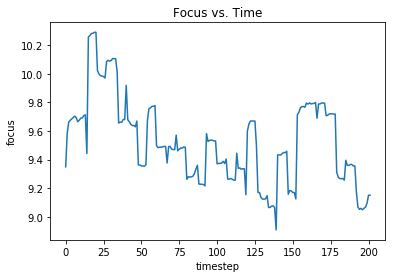

In [13]:
focus = [np.sqrt(a**2+b**2) for a,b in zip(sigx,sigy)]
plt.plot(focus)
plt.xlabel('timestep')
plt.ylabel('focus')
plt.title('Focus vs. Time')

Text(0.5,1,'Centroid vs. Time')

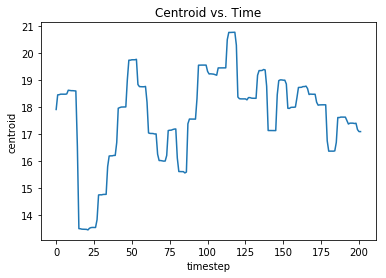

In [14]:
imCenter = (180,120)
centroid = [np.sqrt((a-imCenter[0])**2+(b-imCenter[1])**2) for a,b in zip(centerx,centery)]
plt.plot(centroid)
plt.xlabel('timestep')
plt.ylabel('centroid')
plt.title('Centroid vs. Time')